In [ ]:
import os
import re
import math
import jieba

In [13]:
import jieba
import math
s1 = '这只皮靴号码大了。那只号码合适'
s1_cut = [i for i in jieba.cut(s1, cut_all=True) if i not in ('',',','.',')','(','。','，','（','）') ]
s2 = '这只皮靴号码不小，那只更合适'
s2_cut = [i for i in jieba.cut(s2, cut_all=True) if i not in ('',',','.',')','(','。','，','（','）')]
print(s1_cut)
print(s2_cut)
word_set = set(s1_cut).union(set(s2_cut))
print(word_set)

word_dict = dict()
for i, word in enumerate(word_set):
    word_dict[word] = i
print(word_dict)

s1_cut_code = [word_dict[word] for word in s1_cut]
print("s1_cut_code:",s1_cut_code)
s1_cut_code = [0]*len(word_dict)
print("s1_cut_code:",s1_cut_code)
for word in s1_cut:
    s1_cut_code[word_dict[word]]+=1
print("s1_cut_code:",s1_cut_code)


s2_cut_code = [word_dict[word] for word in s2_cut]
print(s2_cut_code)
s2_cut_code = [0]*len(word_dict)
for word in s2_cut:
    s2_cut_code[word_dict[word]]+=1
print(s2_cut_code)

# 计算余弦相似度
sum = 0
sq1 = 0
sq2 = 0
for i in range(len(s1_cut_code)):
	sum += s1_cut_code[i] * s2_cut_code[i]
	sq1 += pow(s1_cut_code[i], 2)
	sq2 += pow(s2_cut_code[i], 2)

try:
	result = round(float(sum) / (math.sqrt(sq1) * math.sqrt(sq2)), 5)
except ZeroDivisionError:
    result = 0.0
print(result)

['这', '只', '皮靴', '号码', '大', '了', '那', '只', '号码', '合适']
['这', '只', '皮靴', '号码', '不小', '那', '只', '更合', '合适']
{'了', '皮靴', '不小', '那', '这', '合适', '只', '号码', '更合', '大'}
{'了': 0, '皮靴': 1, '不小': 2, '那': 3, '这': 4, '合适': 5, '只': 6, '号码': 7, '更合': 8, '大': 9}
s1_cut_code: [4, 6, 1, 7, 9, 0, 3, 6, 7, 5]
s1_cut_code: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
s1_cut_code: [1, 1, 0, 1, 1, 1, 2, 2, 0, 1]
[4, 6, 1, 7, 2, 3, 6, 8, 5]
[0, 1, 1, 1, 1, 1, 2, 1, 1, 0]
0.80582


### 方法：
- 1.切词
- 2.合并
- 3.统计合并集合中的词分别在两个列表中的出现次数，形成两个向量
- 4.对两个向量计算余弦相似度

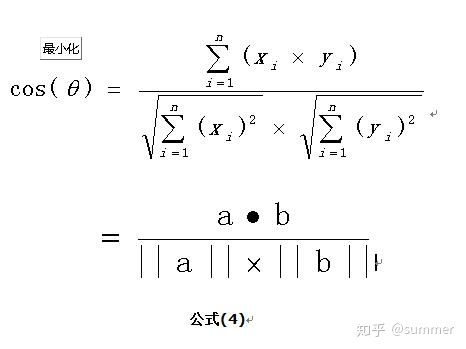

### 自己方法实现

In [10]:
import jieba
import math
import numpy as np
addr1 = '这只皮靴号码大了。那只号码合适'
addr2 = '这只皮靴号码不小，那只更合适'
def cos_similarity(addr1='aaa',addr2='bbb'):
    # 1.切词
    s1_cut = [i for i in jieba.cut(addr1, cut_all=True) if i not in ('',',','.',')','(','。','，','（','）') ]
    s2_cut = [i for i in jieba.cut(addr2, cut_all=True) if i not in ('',',','.',')','(','。','，','（','）')]
    # 2.合并两个词列表
    word_set = set(s1_cut).union(set(s2_cut))
    #3. 对于列表中词加上序号
    word_dict = dict()
    for i, word in enumerate(word_set):
        word_dict[word] = 0
    print("word_dict:",word_dict)
    s1_cut_code=word_dict.copy()
    for word in s1_cut:
        for k,v in s1_cut_code.items():
            if word==k:
                s1_cut_code[k]=v+1
            else:
                s1_cut_code[k]=v+0
    s2_cut_code=word_dict.copy()
    for word in s2_cut:
        for k,v in s2_cut_code.items():
            if word==k:
                s2_cut_code[k]=v+1
            else:
                s2_cut_code[k]=v+0
    print("s1_cut_code:",s1_cut_code)
    print("s2_cut_code:",s2_cut_code)
    addr1_array=np.array(list(s1_cut_code.values()))
    addr2_array=np.array(list(s2_cut_code.values()))
    print("type:",type(addr2_array))
    fenzi=addr1_array.dot(addr2_array)
    fenmnu=math.sqrt(addr1_array.dot(addr1_array))*math.sqrt(addr2_array.dot(addr2_array))
    try:
        final_result = round(fenzi / fenmnu, 5)
    except ZeroDivisionError:
        final_result = 0.0
    return final_result

In [11]:
addr1 = '这只皮靴号码大了。那只号码合适'
addr2 = '这只皮靴号码不小，那只更合适'
a_result=cos_similarity(addr1,addr2)
print(a_result)

word_dict: {'了': 0, '皮靴': 0, '不小': 0, '那': 0, '这': 0, '合适': 0, '只': 0, '号码': 0, '更合': 0, '大': 0}
s1_cut_code: {'了': 1, '皮靴': 1, '不小': 0, '那': 1, '这': 1, '合适': 1, '只': 2, '号码': 2, '更合': 0, '大': 1}
s2_cut_code: {'了': 0, '皮靴': 1, '不小': 1, '那': 1, '这': 1, '合适': 1, '只': 2, '号码': 1, '更合': 1, '大': 0}
type: <class 'numpy.ndarray'>
0.80582
